In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [32]:
# Read the excel file into a pandas DataFrame
df = pd.read_excel('Resources/IBM-Watson-HR-dataset.xlsx', sheet_name='Data')

In [33]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
#look for columns that could potentially be removed
print("Column headings:")
print(df.columns)

Column headings:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [35]:
# drop employee count because all the values are 1 so it's not needed
df = df.drop(["EmployeeCount"], axis=1)

In [36]:
#Everyone here works 80hours in two weeks, so let's drop this column too
df["StandardHours"].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [37]:
#drop standardhours
df = df.drop(["StandardHours"], axis=1)

In [38]:
#investigate "Over18" and "OverTime" columns - are they needed?
df["Over18"].value_counts()
#we have 1,470 total rows with the same value so drop this

Y    1470
Name: Over18, dtype: int64

In [39]:
#drop Over18
df = df.drop(["Over18"], axis=1)

In [40]:
df["OverTime"].value_counts()
#keep OverTime because it has mixed values

No     1054
Yes     416
Name: OverTime, dtype: int64

In [41]:
# our group chose to drop employeenumber, dailyrate, monthlyincome, monthlyrate so that we focus on only one salary variable
df = df.drop(["EmployeeNumber", "DailyRate", "MonthlyIncome", "MonthlyRate"], axis=1)

In [42]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [43]:
#how much data do we have?
df.shape
#we have 1,470 rows and 32 columns

(1470, 28)

In [44]:
#Identify target column and explore its unique values
df["Attrition"].value_counts()
#only two outcomes so this is a binary classification

No     1233
Yes     237
Name: Attrition, dtype: int64

In [45]:
# #convert Yes values to 1 and No values to 0
# df = df[(df["Attrition"] == "Yes") | (df["Attrition"] == "No")]
# mapping_dictionary = {"Attrition": { "Yes": 1, "No": 0 } }
# df = df.replace(mapping_dictionary)
# df.head()

In [46]:
#save work into a CSV file
df.to_csv("Resources/tree_filtered_data.csv",index=False)

In [47]:
#load in the CSV file
filtered_df = pd.read_csv("Resources/tree_filtered_data.csv")
print(filtered_df.shape)
filtered_df.head()

(1470, 28)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [48]:
print("Data types and their frequency\n{}".format(filtered_df.dtypes.value_counts()))
#we have 7 object columns that contain text which need to be converted to numeric

Data types and their frequency
int64     20
object     8
dtype: int64


In [49]:
#what kind of text are in these 7 columns?
object_columns_df = filtered_df.select_dtypes(include=["object"])
print(object_columns_df.iloc[0])

Attrition                     Yes
BusinessTravel      Travel_Rarely
Department                  Sales
EducationField      Life Sciences
Gender                     Female
JobRole           Sales Executive
MaritalStatus              Single
OverTime                      Yes
Name: 0, dtype: object


In [50]:
#explore the unique values in these 7 columns
cols = ['BusinessTravel', 'Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')
    
#Ordinal Values = BusinessTravel (it can be ordered or ranked)
#Nominal Values = Department, EducationField, Gender, JobRole, MaritalStatus, OT

BusinessTravel :
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

Department :
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

EducationField :
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

Gender :
Male      882
Female    588
Name: Gender, dtype: int64 

JobRole :
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64 

MaritalStatus :
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 

OverTime :
No     1054
Yes     

In [51]:
#convert ordinal value (businesstravel) to numeric
mapping_dictionary_2 = {
    "BusinessTravel": {
        "Non-Travel": 1,
        "Travel_Rarely": 2,
        "Travel_Frequently": 3
    }
}

filtered_df = filtered_df.replace(mapping_dictionary_2)
filtered_df[["BusinessTravel"]].head()

,BusinessTravel
0,2
1,3
2,2
3,3
4,2


In [52]:
#encode the nominal columns as dummy variables
nominal_columns = ["Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]
dummy_df = pd.get_dummies(filtered_df[nominal_columns])
filtered_df = pd.concat([filtered_df, dummy_df], axis=1)
filtered_df = filtered_df.drop(nominal_columns, axis=1)
filtered_df.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,Yes,2,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,No,3,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,Yes,2,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,No,3,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,No,2,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [53]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 47 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null object
BusinessTravel                       1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1470 non-null int64
StockOptionLevel                     1470 non-null int64
TotalWorkingYears                    

In [54]:
filtered_df.to_csv("Resources/tree_cleaned_data.csv", index=False)

In [55]:
# https://www.dataquest.io/blog/machine-learning-preparing-data/

In [56]:
df = pd.read_csv("Resources/tree_cleaned_data.csv")
df.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,Yes,2,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,No,3,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,Yes,2,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,No,3,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,No,2,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [57]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier

target = df["Attrition"]
data = df.drop([
    "Attrition", 
    "OverTime_No", 
    "MaritalStatus_Divorced", 
    "JobRole_Healthcare Representative", 
    "Gender_Male", 
    "EducationField_Human Resources", 
    "Department_Human Resources"],
    axis=1)

feature_names = data.columns
data.head()

#split data into training and testing sets
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=1)

In [58]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.779891304347826

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8342391304347826

In [60]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.07045639056354666, 'Age'),
 (0.06464357969708985, 'DistanceFromHome'),
 (0.056389885592588014, 'TotalWorkingYears'),
 (0.05585866039051046, 'HourlyRate'),
 (0.052204840199613495, 'OverTime_Yes'),
 (0.051607867006230386, 'YearsAtCompany'),
 (0.04091105160597772, 'PercentSalaryHike'),
 (0.03886043589758344, 'EnvironmentSatisfaction'),
 (0.037534619320933514, 'NumCompaniesWorked'),
 (0.03648574460878585, 'YearsWithCurrManager'),
 (0.03490929396933878, 'YearsInCurrentRole'),
 (0.03414473586422872, 'TrainingTimesLastYear'),
 (0.033177391256041314, 'JobInvolvement'),
 (0.032762097199665524, 'StockOptionLevel'),
 (0.03073965205865605, 'YearsSinceLastPromotion'),
 (0.029749716180498056, 'JobSatisfaction'),
 (0.029632987874060036, 'WorkLifeBalance'),
 (0.026244664126874137, 'JobLevel'),
 (0.026241583236463993, 'RelationshipSatisfaction'),
 (0.025616553310153122, 'BusinessTravel'),
 (0.023725774610702702, 'Education'),
 (0.018606996781733047, 'MaritalStatus_Single'),
 (0.011926767804334827, 

In [61]:
#one-sample t-test (measuring age v. attrition)
#null hypothesis: there is no difference in age btwn employees who left and those who stayed

#Compare the means of employee attrition age against the employee population who stayed
emp_population = df['Age'].mean()
emp_turnover_age = df[df['Attrition']=="Yes"]['Age'].mean()

print( 'The mean age for the employee population is: ' + str(emp_population))
print( 'The mean age for employees that had a turnover is: ' + str(emp_turnover_age) )


The mean age for the employee population is: 36.923809523809524
The mean age for employees that had a turnover is: 33.607594936708864


0       41
2       37
14      28
21      36
24      34
26      32
33      39
34      24
36      50
42      26
45      41
50      48
51      28
69      36
89      46
100     37
102     20
107     25
111     34
122     56
124     31
126     58
127     19
132     31
136     51
140     32
171     19
177     19
182     41
192     35
        ..
1262    43
1271    21
1273    22
1279    44
1281    35
1290    34
1291    37
1297    26
1298    46
1312    31
1313    29
1326    32
1332    29
1333    46
1338    30
1339    22
1353    34
1354    56
1365    29
1369    28
1375    32
1379    27
1390    28
1395    31
1396    53
1438    23
1442    29
1444    56
1452    50
1461    50
Name: Age, Length: 237, dtype: int64

In [66]:
#convert Yes values to 1 and No values to 0
df = df[(df["Attrition"] == "Yes") | (df["Attrition"] == "No")]
mapping_dictionary = {"Attrition": { "Yes": 1, "No": 0 } }
df = df.replace(mapping_dictionary)
df.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,2,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,0,3,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,2,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,0,3,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,0,2,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [67]:
emp_population = df['Age'].mean()
emp_turnover_age = df[df['Attrition']==1]['Age'].mean()

print( 'The mean age for the employee population is: ' + str(emp_population))
print( 'The mean age for employees that had a turnover is: ' + str(emp_turnover_age) )


The mean age for the employee population is: 36.923809523809524
The mean age for employees that had a turnover is: 33.607594936708864


In [68]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['Attrition']==1]['Age'], # Sample of Employee age who had a Turnover
              popmean = emp_population)  # Employee Who Had No Turnover age mean

Ttest_1sampResult(statistic=-5.268926728565501, pvalue=3.091919341321694e-07)

In [70]:
#above test result shows the test statistic "t" is equal to -5.26. 
#this tell us how much the sample mean deviates from the null hypothesis
#if the t-statistic (-5.26) is outside the quantiles then we reject null hyp.

degree_freedom = len(df[df['Attrition']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9700240104025675
The t-distribution right quartile range is: 1.970024010402567


In [71]:
#reject the null hypothesis because:
#1) t-test score (-5.26) is outside the quantiles
#2) p-value (3.091919341321694e-07) is lower than confidence level of 5%
#Thus, based on this one sample, there is significant difference btwn the mean age of employees who left versus those who stay

In [78]:
#one-sample t-test (measuring hourly rate v. attrition)
#null hypothesis: there is no difference in hourly rate btwn employees who left and those who stayed

#Compare the means of employee attrition hourly rate against the employee population who stayed
emp_population_pay = df['HourlyRate'].mean()
emp_turnover_pay = df[df['Attrition']==1]['HourlyRate'].mean()

print( 'The mean hourly rate for the employee population is: ' + str(emp_population_pay))
print( 'The mean hourly rate for employees that had a turnover is: ' + str(emp_turnover_pay) )

The mean hourly rate for the employee population is: 65.89115646258503
The mean hourly rate for employees that had a turnover is: 65.57383966244726


In [79]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['Attrition']==1]['HourlyRate'], # Sample of Employee hourly rate who had a Turnover
              popmean = emp_population_pay)  # Employee Who Had No Turnover hourly rate mean

Ttest_1sampResult(statistic=-0.24303683324362974, pvalue=0.8081879675889055)

In [77]:
#hourly rate is not significantly different (p-value is greater than 0.05)

In [80]:
#one-sample t-test (measuring hourly rate v. attrition)
#null hypothesis: there is no difference in hourly rate btwn employees who left and those who stayed

#Compare the means of employee attrition hourly rate against the employee population who stayed
emp_population_OT = df['OverTime_Yes'].mean()
emp_turnover_OT = df[df['Attrition']==1]['OverTime_Yes'].mean()

print( 'The mean overtime_yes for the employee population is: ' + str(emp_population_OT))
print( 'The mean overtime_yes for employees that had a turnover is: ' + str(emp_turnover_OT) )

import scipy.stats as stats
stats.ttest_1samp(a=  df[df['Attrition']==1]['OverTime_Yes'], # Sample of Employee age who had a Turnover
              popmean = emp_population_OT)  # Employee Who Had No Turnover age mean

The mean overtime_yes for the employee population is: 0.2829931972789116
The mean overtime_yes for employees that had a turnover is: 0.5358649789029536


Ttest_1sampResult(statistic=7.789444958303489, pvalue=2.124287654870015e-13)

In [81]:
#overtime_yes is significantly different

In [82]:
#one-sample t-test (measuring hourly rate v. attrition)
#null hypothesis: there is no difference in hourly rate btwn employees who left and those who stayed

#Compare the means of employee attrition hourly rate against the employee population who stayed
emp_population_ES = df['EnvironmentSatisfaction'].mean()
emp_turnover_ES = df[df['Attrition']==1]['EnvironmentSatisfaction'].mean()

print( 'The mean overtime_yes for the employee population is: ' + str(emp_population_ES))
print( 'The mean overtime_yes for employees that had a turnover is: ' + str(emp_turnover_ES) )

import scipy.stats as stats
stats.ttest_1samp(a=  df[df['Attrition']==1]['EnvironmentSatisfaction'], # Sample of Employee age who had a Turnover
              popmean = emp_population_ES)  # Employee Who Had No Turnover age mean

The mean overtime_yes for the employee population is: 2.721768707482993
The mean overtime_yes for employees that had a turnover is: 2.4641350210970465


Ttest_1sampResult(statistic=-3.3905366280447264, pvalue=0.0008175913692967167)

In [83]:
#environment satisfaction is statistically differnet.

In [84]:
# Use n_clusters=4 as the k value
# We can see from the plot above that there are 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [85]:
# Fit the model to the data
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [87]:
# Predict the clusters
predicted_clusters = kmeans.predict(data)

ValueError: x and y must be the same size

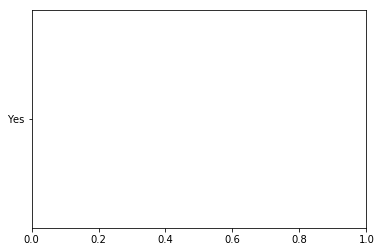

In [91]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(data, target, c=predicted_clusters, s=50, cmap='viridis')